In [1]:
import sys


from utils import *

import cv2
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

import torch
from PIL import Image
import os, shutil
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

from tqdm.notebook import tqdm
import numpy as np
from torchvision import transforms as T

from collections import Counter
from pathlib import Path
from utils.dataset import CloudDataset
from DeepCluster.visualize import *

from DeepCluster.cluster import cluster
import pickle



In [2]:
transformer = T.Compose([
    T.Resize([256, 256]),
    T.ToTensor(),
])

batch_size = 1
PATH = "./model/model.ckpt"
root = './MULTI_SCALE/512/train'
limit_images = 999999



different_models = ['trained on 256 tiles', 'trained on max square', 'trained on zooniverse train'] 
interest = 0
PATH = "./model/"+str(different_models[interest])+"/model.ckpt"
root = "CLUSTERING_BIGGEST_SQUARE/train"
pca = pickle.load(open("./model/"+str(different_models[interest])+"/pca.pkl", 'rb'))#IncrementalPCA(n_components=pca_dim, batch_size=512, whiten=True)
kmeans = pickle.load(open("./model/"+str(different_models[interest])+"/kmeans.pkl", 'rb'))
model = torch.load(PATH)
model.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

4569
Number of cloud images : 4569


extracting features: 100%|██████████| 4569/4569 [02:00<00:00, 37.79it/s]


4569
len labs : 4569
predictions : 4569
(4, 12)
(4,)
(12, 4)


<AxesSubplot:title={'center':'Confusion Matrix Clusters DeepClustering model %  SCALE '}>

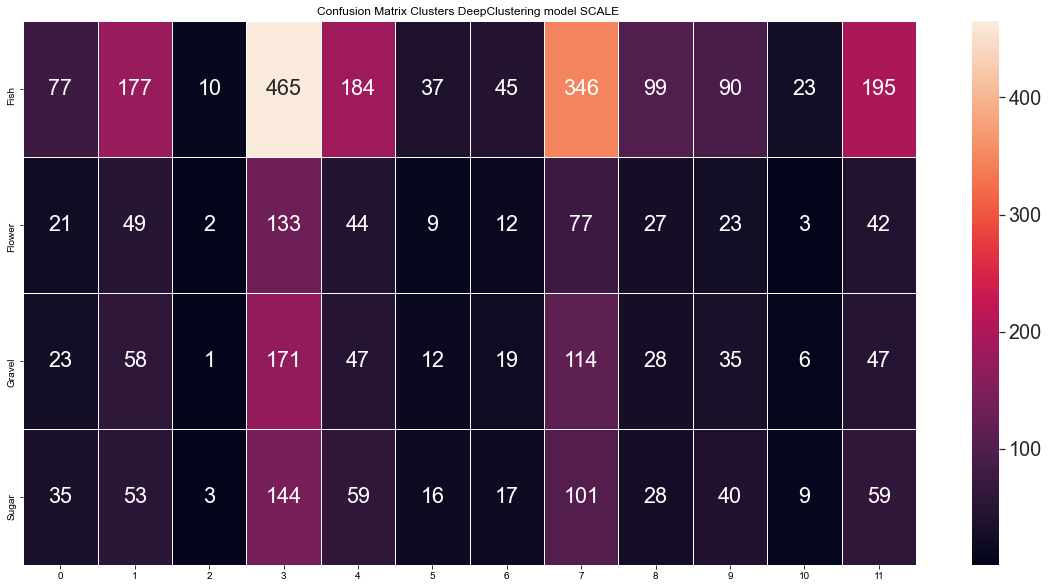

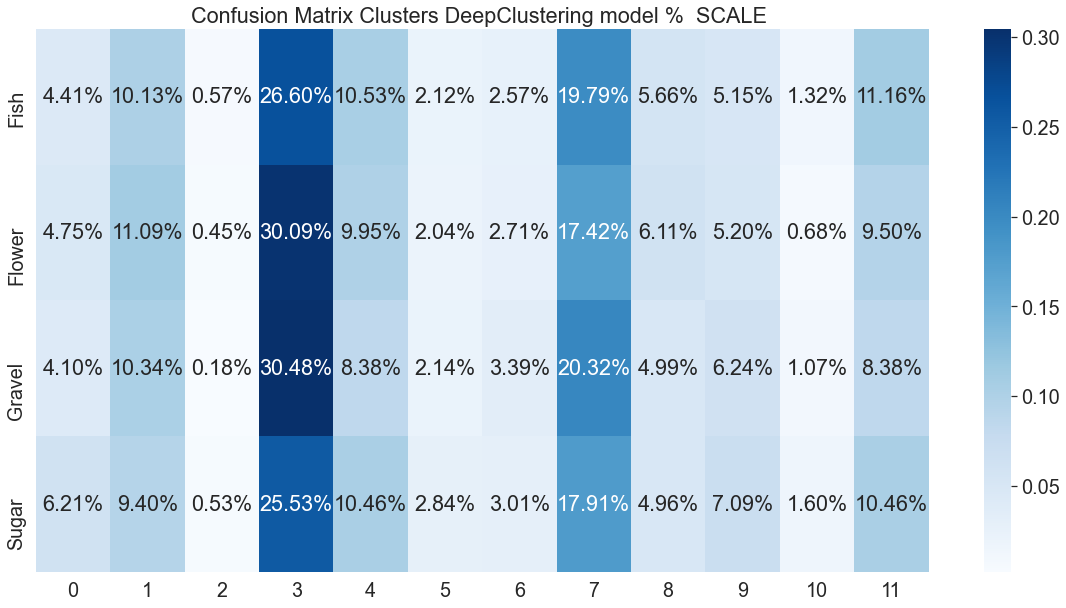

In [4]:
dataset_path =  "/home/raysamram/DATASETS/CLUSTERING_BIGGEST_SQUARE/train/"

with open("/home/raysamram/DATASETS/CLUSTERING_BIGGEST_SQUARE/labels.pickle", "rb") as handle:
    labs = pickle.load(handle)

print(len(labs))


raw_dataset = CloudDataset(root=dataset_path, transforms=transformer, limit=limit_images)
pseudo_labels, features = cluster(pca, kmeans, model, raw_dataset, batch_size, return_features=True)
clusters = pseudo_labels
print(len(clusters))
clclc = list(map(int, clusters))
print("len labs : "+str(len(labs)))
print("predictions : "+str(len(clclc)))
cfs_mat = confusion_matrix(labs, clclc)

associations = ['Fish', 'Flower', 'Gravel', 'Sugar']
fig, ax = plt.subplots(figsize=(20,10)) 
plt.title("Confusion Matrix Clusters DeepClustering model SCALE ")
sns.set(font_scale=1.8)
sns.heatmap(cfs_mat[:4,:], annot=True, fmt='', ax=ax, linewidths=.9, yticklabels=associations)
fig, ax = plt.subplots(figsize=(20,10))
print(cfs_mat[:4,:].shape)
print(   np.sum(  cfs_mat[:4,:], axis=1  ).shape  )
print(   (  cfs_mat[:4,:].T/np.sum(cfs_mat[:4,:], axis=1)    ).shape  )
plt.title("Confusion Matrix Clusters DeepClustering model %  SCALE ")
sns.heatmap( (cfs_mat[:4,:].T/np.sum(cfs_mat[:4,:], axis=1)).T, annot=True, 
            fmt='.2%', cmap='Blues' , yticklabels=associations)
